Today's challenge involves visualizing stock market trends, analyzing volatility, and detecting patterns in financial data using advanced Matplotlib techniques.

Tasks to Complete:
Stock Price Trend (Line Chart): Visualize stock prices over time.
Stock Returns Distribution (Histogram & KDE): Analyze daily returns.
Moving Average vs. Actual Prices (Dual Line Chart): Compare 50-day moving average with actual prices.
Candlestick Chart (OHLC Visualization): Represent open-high-low-close trends.


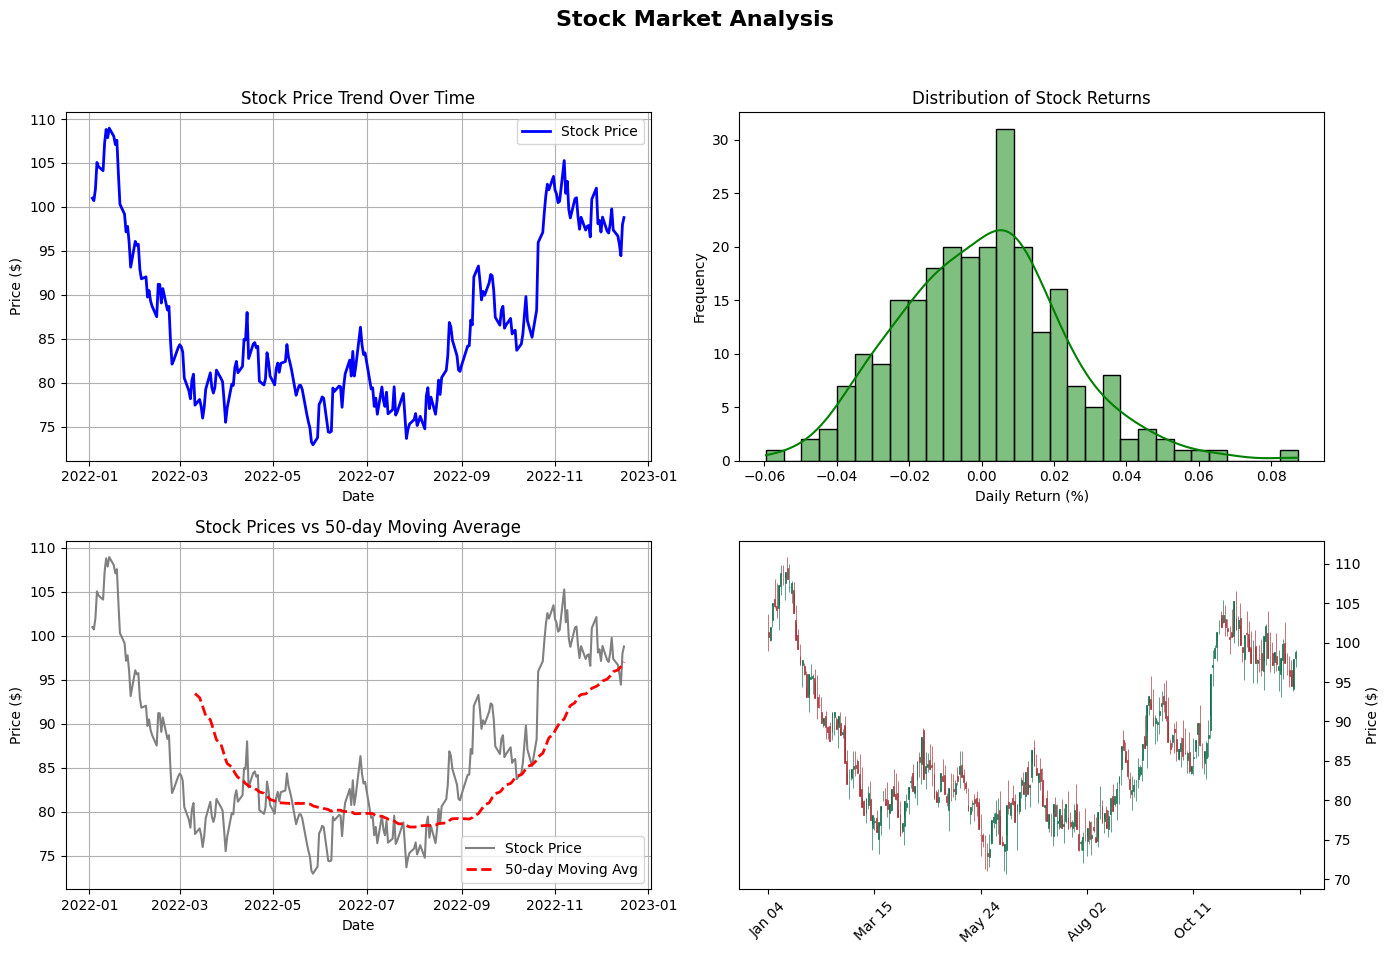

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mplfinance as mpf

# Simulate financial stock data
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=250, freq="B")  # 250 business days
stock_prices = np.cumsum(np.random.randn(250) * 2) + 100  # Simulated stock prices
daily_returns = np.diff(stock_prices) / stock_prices[:-1]  # Compute daily returns
moving_avg_50 = pd.Series(stock_prices).rolling(50).mean()  # 50-day moving average

# Simulating Open-High-Low-Close (OHLC) data
open_prices = stock_prices[:-1] + np.random.uniform(-1, 1, len(stock_prices) - 1)
high_prices = open_prices + np.random.uniform(0, 3, len(stock_prices) - 1)
low_prices = open_prices - np.random.uniform(0, 3, len(stock_prices) - 1)
close_prices = stock_prices[1:]
ohlc_data = pd.DataFrame({"Open": open_prices, "High": high_prices, "Low": low_prices, "Close": close_prices}, index=dates[1:])

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Stock Market Analysis", fontsize=16, fontweight="bold")

# Line Chart: Stock Price Trend
ax1 = axs[0, 0]
ax1.plot(dates, stock_prices, label="Stock Price", color="blue", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Price ($)")
ax1.set_title("Stock Price Trend Over Time")
ax1.grid(True)
ax1.legend()

# Histogram & KDE: Daily Returns Distribution
ax2 = axs[0, 1]
sns.histplot(daily_returns, kde=True, bins=30, color="green", ax=ax2)
ax2.set_xlabel("Daily Return (%)")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of Stock Returns")

# Dual Line Chart: Moving Average vs. Actual Prices
ax3 = axs[1, 0]
ax3.plot(dates, stock_prices, label="Stock Price", color="gray", linewidth=1.5)
ax3.plot(dates, moving_avg_50, label="50-day Moving Avg", color="red", linestyle="--", linewidth=2)
ax3.set_xlabel("Date")
ax3.set_ylabel("Price ($)")
ax3.set_title("Stock Prices vs 50-day Moving Average")
ax3.grid(True)
ax3.legend()

# Candlestick Chart: Open-High-Low-Close (OHLC)
mpf.plot(ohlc_data, type="candle", style="charles", ax=axs[1, 1], ylabel="Price ($)")

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
